# Домашняя работа: анализ падения точности LLM после квантизации и спарсификации

## Подготовка окружения

In [1]:
!pip install datasets accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 570.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
!pip install lm-eval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=1da5e2acda41652f8e2919ecf6fbaca4cc2e7cbb991d2926bbed4d69b0497257
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
  Created wheel for sqlitedict: filename=

In [3]:
!git clone https://github.com/ZhMax/basic_sparse_quant.git

Cloning into 'basic_sparse_quant'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 97 (delta 5), reused 54 (delta 5), pack-reused 42
Receiving objects: 100% (97/97), 57.36 MiB | 21.93 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [4]:
import os
SAVING_DIR = '/content/'
os.environ["TRANSFORMERS_CACHE"] = SAVING_DIR + "hf_cache/"
os.environ["HF_HOME"] = SAVING_DIR + "hf_cache/"

## Загрузка модели

https://huggingface.co/facebook/opt-350m <br>

OPT: Open Pre-trained Transformer Language Models <br>
Семейство моделей с архитектурой GPT-трансформера, выпущенные в начале 2022 года. Обучение моделей выполнялось на корпусах, состоящих преимущественно из текстов на английском языке.

In [5]:
!git clone https://huggingface.co/facebook/opt-350m

Cloning into 'opt-350m'...
remote: Enumerating objects: 115, done.
remote: Total 115 (delta 0), reused 0 (delta 0), pack-reused 115
Receiving objects: 100% (115/115), 558.77 KiB | 4.62 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Filtering content: 100% (3/3), 1.85 GiB | 60.67 MiB/s, done.


## lm-evaluation-harness <br>

https://github.com/EleutherAI/lm-evaluation-harness/ <br>

harness - единый фреймворк для тестирования эффективности языковых модели на большом количестве различных заданий. <br>

https://huggingface.co/datasets/winogrande <br>

WinoGrande - коллекция из 44 тыс. вопросов, вдохновленная Winograd Schema Challenge (Левеск, Дэвис и Моргенштерн, 2011). Каждый вопрос формулируется в виде тестового задания с двумя ответами. Цель выбрать правильный ответ, что требует рассуждений на основе здравого смысла.

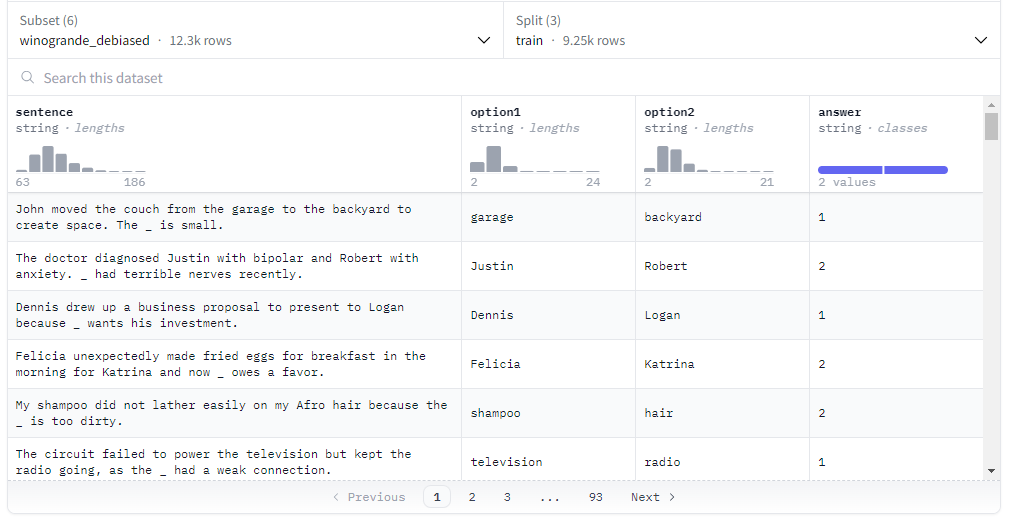

https://huggingface.co/datasets/google/boolq

BoolQ - набор из 15942 заданий с ответами "да"/"нет" на вопросы, которые формулируются на основе отрывка текста.

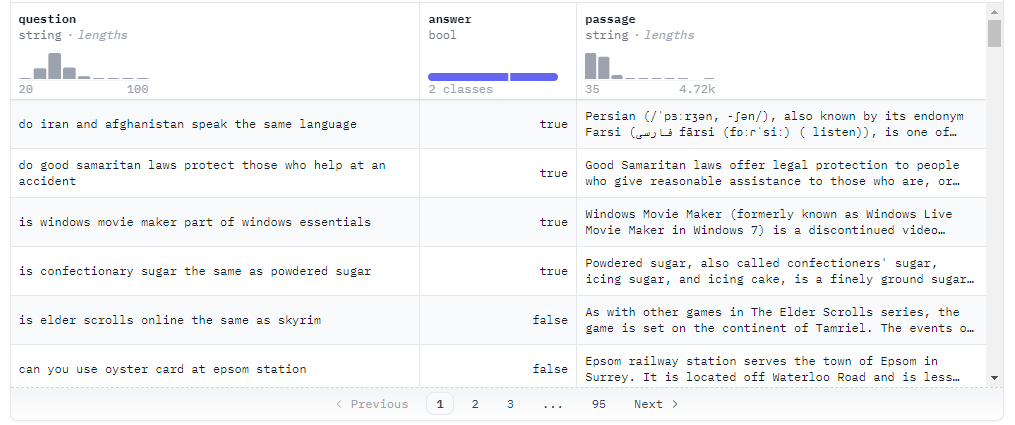

In [15]:
!lm_eval --model hf \
    --model_args "pretrained=/content/opt-350m" \
    --tasks winogrande,boolq \
    --batch_size 4 \
    --num_fewshot 0 \
    --device cuda

/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2024-04-08 14:29:54.142580: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 14:29:54.142636: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 14:29:54.144629: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-08 14:29:55.705657: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-08:14:29:59,006 INFO   

## Метод квантизации QUIK <br>

https://github.com/IST-DASLab/QUIK/tree/master <br>

Метод QUIK - улучшение версия метода GPTQ, в котором в матрицах весов $W$ каждого слоя модели выделяются столбцы outliers. Данные столбцы не квантизуются, что дает возможность существенно повысить качество модели
без значительного увеличения в ее размере. В отличии от LLM.int8() столбцы outliers определяются заранее, исходя из максимального значения активаций в каждом слое, расчитанных на калибровочном датасете. Благодаря этому метод QUIK имеет более высокую скорость инференса по сравнению с LLM.int8().


<em> Описание параметров: </em>

`model` - путь к директории, где хранится модель. <br>
`path_to_act_scales` - путь к файлу с максимальными значений активаций для каждого слоя. <br>
Данный файл может быть получен с помощью `generate_act_scales.py` из репозитория `https://github.com/mit-han-lab/smoothquant/tree/main`. <br>
`path_to_save_quant_model` - путь к директории, где будет сохранена модель после квантизации. Модель сохранятся с деквантизованными fp весами. <br>
`fp_features` - количество столбцов outliers в каждом слое, которые не будут квантизованы. <br>
`a_bits` - уровень битности [4, 8, 16], в котором будут вычислены активации для каждого слоя. Если уровень битности меньше 16, то активации квантизуются. Но активации, соответствующие столбцам outliers, остаются всегда в fp16/bf16. <br>
`w_bits` - уровень квантизации [4, 8, 16] весов модели. сли уровень битности 16, то веса не квантизуются. <br>
`w_clip` - индикатор, указывающий, что коэффициент $\alpha$, который используется для масштабирования весов модели $\dfrac{\mathrm{abs}(\mathbf{W})}{\alpha}$ при квантизации, будет найден путем подбора, исходя из минимизации ошибки квантизации $ \lVert \mathbf{W} - \tilde{\mathbf{W}} \rVert_{2}$, где $\tilde{\mathbf{W}}$ - деквантизованные веса. Поскольку в этом случае значение $\alpha$ может быть меньше, чем максимальное значение весов $\mathbf{W}$, то веса модели после квантизации $(2^{\mathrm{w\_bits} - 1} - 1)\dfrac{\mathbf{W}}{\alpha}$ ограничиваются до промежутку $[-2^{\mathrm{w\_bits} - 1},\, 2^{\mathrm{w\_bits} - 1} - 1]$. <br>
`dataset` - калиброчовный датасет, который используется для вычисления матрицы Гессе $\mathbf{H}$ для каждого слоя модели.



In [6]:
!python /content/basic_sparse_quant/quik/experiments/fake_quant/opt.py \
    --model /content/opt-350m \
    --path_to_act_scales /content/basic_sparse_quant/quik/experiments/act_scales/opt_350m.pt \
    --path_to_save_quant_model /content/weight/opt_350_w4_a16 \
    --fp_features 128 \
    --a_bits 16 \
    --w_bits 4 \
    --w_clip \
    --dataset wikitext2

/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
Namespace(model='/content/opt-350m', path_to_save_quant_model='/content/weight/opt_350_w4_a16', path_to_act_scales='/content/basic_sparse_quant/quik/experiments/act_scales/opt_350m.pt', dataset='wikitext2', seed=0, nsamples=128, percdamp=0.01, fp_features=128, a_bits=16, w_bits=4, w_clip=True, w_asym=False, sparsity=0, prunen=0, prunem=0, wandb=False, wandb_name='anonymous', int8_2_4=False, smoothquant=False, synthetic_data=False, sparseGPT=False)
Loading /content/opt-350m Model...
Loaded act_scales from:  /content/basic_sparse_quant/quik/experiments/act_scales/opt_350m.pt
Generating test split: 100% 4358/4358 [00:00<00:00, 113547.59 examples/s]
Generating train split: 100% 36718/36718 [00:00<00:00, 732715.09 examples/s]
Generating validation split: 100% 3760/3760 [00:00<00:00, 6

In [7]:
!lm_eval --model hf \
    --model_args "pretrained=/content/weight/opt_350_w4_a16" \
    --tasks winogrande,boolq \
    --batch_size 4 \
    --num_fewshot 0 \
    --device cuda

/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2024-04-08 13:42:48.634355: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 13:42:48.634412: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 13:42:48.743202: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-08 13:42:50.942531: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-08:13:42:55,570 INFO   

## Метод спарсификации SparseGPT

https://github.com/IST-DASLab/sparsegpt

SparseGPT - метод спарсификации LLM, основанные на процедуре Optimal Brain Surgeon (OBS). Оценка значимости каждого веса $w_{m}$ в матрице весов $\mathbf{W}$ выполняется, исходя из его влияния на функцию Лагранжа:

$\begin{align}
L = \dfrac{1}{2} \dfrac{w_{m}^{2}}{[\mathbf{H}^{-1}]_{mm}}.
\end{align}$

Согласно теории OBS функция Лагранжа $L$ связана с ошибкой $E$, вызванной занулением веса $w_{m}$:

$\begin{align}
E = \lVert \mathbf{W}\mathbf{X} - \tilde{\mathbf{W}}\mathbf{X} \rVert_{2}^{2},
\end{align}$
где $\tilde{\mathbf{W}}$ - матрица весов после зануления $w_{m}$.

После расчета значимости каждого веса в выбранном слое, выполняется последовательное (слево-направо) обнуления малозначимых весов $w_{m}$. По аналогии с GPTQ обнуление весов выполняется по столбцам, которые сгруппированы в блоки.
При этом ошибка, вызыванная спарсификацией, компенсируется путем калибровки весов, находящихся в одной строке с зануленными весами $\mathbf{w}_{m}$:

$\begin{align}
\mathbf{w}_{update} = \mathbf{w} + \delta \mathbf{w} = \mathbf{w} + \dfrac{\mathbf{w}_{m}}{[\mathbf{H}^{-1}]_{mm}} \mathbf{H}^{-1}_{:, m}
\end{align}$

<em> Описание параметров </em>
`model` - путь к директории, где хранится модель. <br>
`dataset` - калибровочный датасет, который используется для расчета матрицы Гессе $\mathbf{H}$. <br>
`sparsity` - коэффициент спарсификации, в интервале от 0.0 (оригинальная модель) до 1.0.<br>
`wbits` - уровень битности для спарсифированной модели [4, 8, 16]. Если уровень битности меньше 16, то
вместе со спарсификацией будет выполнена также квантизация модели методом GPTQ. Если уровень спрасификации 0.0, то будет выполнена только квантизация методом GPTQ. <br>
`sparsity_type` - тип спарсификации. <br>
`save_model` - путь к директории, в которой будет сохранена модель.

In [ ]:
!python  /home/spars_quant/sparsegpt/opt.py \
    --model /home/LLaMA/huggingface/opt-350m \
    --dataset wikitext2 \
    --sparsity 0.5 \
    --wbits 16 \
    --save /content/weights/opt350m_sparsegpt_50_w16_a16

In [ ]:
!lm_eval --model hf \
    --model_args "pretrained=/content/weights/opt350m_sparsegpt_50_w16_a16" \
    --tasks winogrande,boolq \
    --batch_size 4 \
    --num_fewshot 0 \
    --device cuda

In [3]:
!python  /home/spars_quant/sparsegpt/opt.py \
    --model /home/LLaMA/huggingface/opt-350m \
    --dataset wikitext2 \
    --sparsity 0.0 \
    --wbits 4 \
    --save /content/weights/opt350m_gptq_w4_a16

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Starting ...
Ready.
0 self_attn.k_proj
Pruning ...
time 0.63
error 44.008323669433594
0 self_attn.v_proj
Pruning ...
time 0.49
error 4.0060224533081055
0 self_attn.q_proj
Pruning ...
time 0.48
error 62.487083435058594
0 self_attn.out_proj
Pruning ...
time 0.48
error 0.01483080256730318
0 fc1
Pruning ...
time 0.48
error 20920.123046875
0 fc2
Pruning ...
time 1.95
error 431.683349609375
1 self_attn.k_proj
Pruning ...
time 0.50
error 6478.5068359375
1 self_attn.v_proj
Pruning ...
time 0.48
error 3204.97998046875
1 self_attn.q_proj
Pruning ...
time 0.52
error 5883.50244140625
1 self_attn.out_proj
Pruning 

!lm_eval --model hf \
    --model_args "pretrained=/content/weights/opt350m_gptq_w4_a16" \
    --tasks winogrande,boolq \
    --batch_size 4 \
    --num_fewshot 0 \
    --device cuda

In [ ]:
# !python /content/basic_sparse_quant/wanda/main_opt.py \
#     --model /content/weight/opt_350_w4_a16 \
#     --prune_method sparsegpt \
#     --sparsity_ratio 0.5 \
#     --sparsity_type unstructured \
#     --save_model /content/weight/opt350m_sparsegpt_50_after_quant

## Метод спарсификации Wanda

https://github.com/locuslab/wanda?tab=readme-ov-file

Wanda - метод неструктурной спарсификации LLM, в котором ранжирование значимости весов $\mathbf{W}$ каждого слоя модели выполняется посредством метрики:

$\begin{align}
score(\mathbf{W}) = \lvert \mathbf{W} \rvert \cdot \lVert \mathbf{X} \rVert_{2},
\end{align}$
где $\lVert \mathbf{X} \rVert_{2}$ - усредненные по всем строкам посредством $L_{2}$ нормы значения активаций.

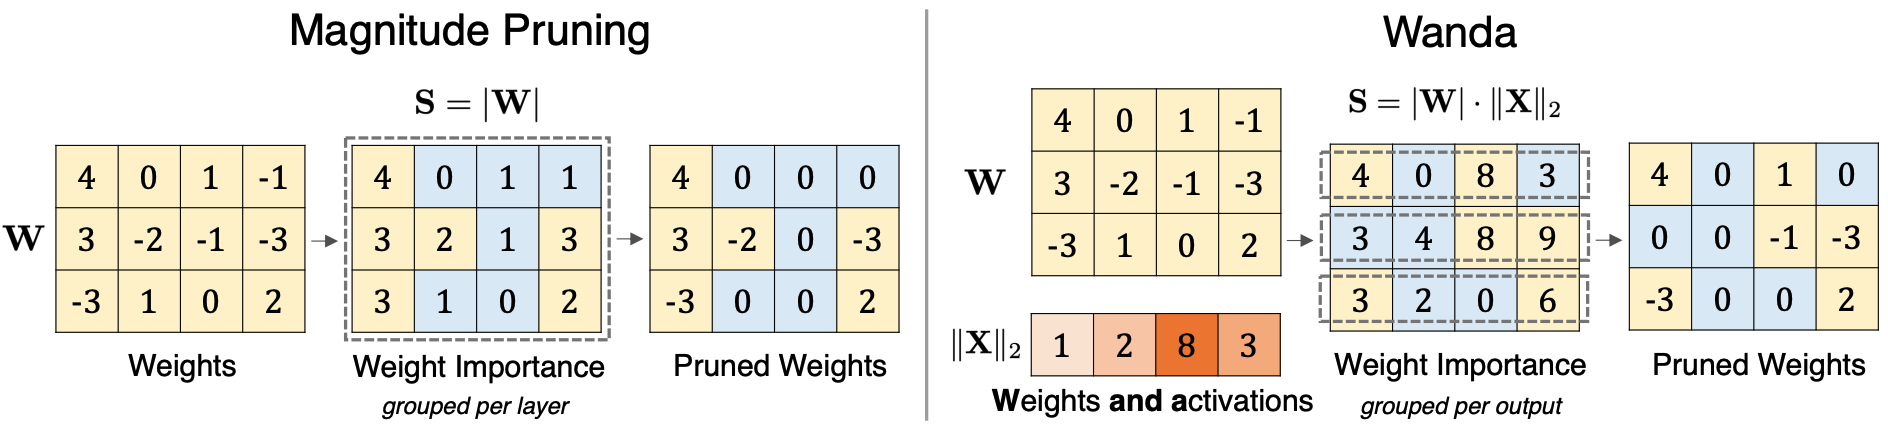

<em> Описание параметров </em>
`model` - путь к директории, где хранится модель. <br>
`prune_method` - метод спарсификации. <br>
`sparsity_ratio` - коэффициент спарсификации, в интервале от 0.0 (оригинальная модель) до 1.0. <br>
`sparsity_type` - тип спарсификации. <br>
`save_model` - путь к директории, в которой будет сохранена модель.

In [9]:
!python /content/basic_sparse_quant/wanda/main_opt.py \
    --model /content/opt-350m \
    --prune_method wanda \
    --sparsity_ratio 0.5 \
    --sparsity_type unstructured \
    --save_model /content/weight/opt350m_wanda_50

/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
torch 2.2.1+cu121
transformers 4.38.2
accelerate 0.29.1
# of gpus:  1
loading llm model /content/opt-350m
use device  cuda:0
pruning starts
loading calibdation data
dataset loading complete
pruning layer 0 name self_attn.k_proj
pruning layer 0 name self_attn.v_proj
pruning layer 0 name self_attn.q_proj
pruning layer 0 name self_attn.out_proj
pruning layer 0 name fc1
pruning layer 0 name fc2
pruning layer 1 name self_attn.k_proj
pruning layer 1 name self_attn.v_proj
pruning layer 1 name self_attn.q_proj
pruning layer 1 name self_attn.out_proj
pruning layer 1 name fc1
pruning layer 1 name fc2
pruning layer 2 name self_attn.k_proj
pruning layer 2 name self_attn.v_proj
pruning layer 2 name self_attn.q_proj
pruning layer 2 name self_attn.out_proj
pruning layer 2 name fc1
pruning layer

In [10]:
!lm_eval --model hf \
    --model_args "pretrained=/content/weight/opt350m_wanda_50" \
    --tasks winogrande,boolq \
    --batch_size 4 \
    --num_fewshot 0 \
    --device cuda

/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2024-04-08 13:59:43.446479: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 13:59:43.446526: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 13:59:43.447934: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-08 13:59:44.645927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-08:13:59:47,889 INFO   